<a href="https://colab.research.google.com/github/Iliyyin/ml-dl/blob/main/Text_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installations and imports

In [ ]:
#Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
#Model and stratification
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


###Data loading and preprocessing


In [ ]:
#loading csv file
df = pd.read_csv('/content/ecommerceDataset.csv')

In [ ]:
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [ ]:
# observing there is a problem with the columns header, we aim to adjust and
# rename.
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [ ]:
#this can be easily avoided by relaoding data appropriately
df = pd.read_csv('/content/ecommerceDataset.csv',
                 header=None,
                 names=['category', 'description'])#we just specified it had no header and inputted the names wanted.
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df.category.value_counts()

,count
category,
Household,19313
Books,11820
Electronics,10621
Clothing & Accessories,8671


In [ ]:
# we have spotted that our data has a class imbalance problem, and we would be
# employing stratification after our splitting step.
y = df.iloc[:,:-1].values
x = df.iloc[:,-1].values
print(x)
print(y)

['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bli

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)


[3 3 3 ... 2 2 2]


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Display the mapping of numerical labels to original categories
print("Mapping of numerical labels to original categories:")
for i, category in enumerate(le.classes_):
    print(f"{i}: {category}")

Mapping of numerical labels to original categories:
0: Books
1: Clothing & Accessories
2: Electronics
3: Household


In [ ]:
# tokenize into words, remove stop words, and rejoin words.
stop_words = set(stopwords.words('english'))

processed_x = []
for description in x:
    # Ensure the description is treated as a string
    description_str = str(description)
    # Tokenize the description into words
    words = word_tokenize(description_str)
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a string
    processed_description = ' '.join(filtered_words)
    processed_x.append(processed_description)

x = processed_x
print(x[:5]) # Print the first 5 processed descriptions to check

['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints ( 8.7 X 8.7 inch ) - Set 4 Painting made synthetic frame uv textured print gives multi effects attracts towards . special series paintings makes wall beautiful gives royal touch . painting ready hang , would proud possess unique painting niche apart . use modern efficient printing technology prints , inks precision epson , roland hp printers . innovative hd printing technique results durable spectacular looking prints highest last lifetime . print solely top-notch 100 % inks , achieve brilliant true colours . Due high level uv resistance , prints retain beautiful colours many years . Add colour style living space digitally printed painting . pleasure eternal bliss.so bring home elegant print lushed rich colors makes nothing sheer elegance friends family.it would treasured forever whoever lucky recipient . Liven place intriguing paintings high definition hd graphic digital prints home , office room .', "SAF 'F

###Implementing the vectorizer and SVM model


In [ ]:
tf = TfidfVectorizer()
x_tf = tf.fit_transform(x)
print(x_tf[:5])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 389 stored elements and shape (5, 78856)>
  Coords	Values
  (0, 53289)	0.060292577792281976
  (0, 55083)	0.08571883085739916
  (0, 24745)	0.036668693077698176
  (0, 32222)	0.09520789657898267
  (0, 75332)	0.10555318092520218
  (0, 35613)	0.06423705548449343
  (0, 48676)	0.09150498007580195
  (0, 51577)	0.10274162498720338
  (0, 24045)	0.05712103034581717
  (0, 12199)	0.05755223131520539
  (0, 56643)	0.36720528585135925
  (0, 38589)	0.046408051359810805
  (0, 63395)	0.037381256123286945
  (0, 53054)	0.3133805338480446
  (0, 45345)	0.03435681906086313
  (0, 69002)	0.08146840933756011
  (0, 32220)	0.06283917084271146
  (0, 73838)	0.14194497081659127
  (0, 70094)	0.0812302828750213
  (0, 56620)	0.1701124264159127
  (0, 33790)	0.10164920985979985
  (0, 49084)	0.050988111179791115
  (0, 27769)	0.07405865918404023
  (0, 12778)	0.1016242723680186
  (0, 71300)	0.07535618387365671
  :	:
  (4, 23964)	0.1536330552964939
  (4, 50038)	0.0

In [ ]:
#initial split
x_train, x_test, y_train, y_test = train_test_split(x_tf, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#strstification to get a performance estimate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LinearSVC(random_state = 0, max_iter = 5000)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
print(scores)

[0.97744175 0.97669807 0.97954883 0.97744175 0.97880516]


In [ ]:
#Satisfied with the accuracy we can now fir the model over the entire set.
model.fit(x_train, y_train)


LinearSVC(max_iter=5000, random_state=0)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.979573624194348


###Report & Visualization

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2292   16   14   42]
 [   8 1709    5   12]
 [  12    1 2062   49]
 [  13   14   20 3816]]


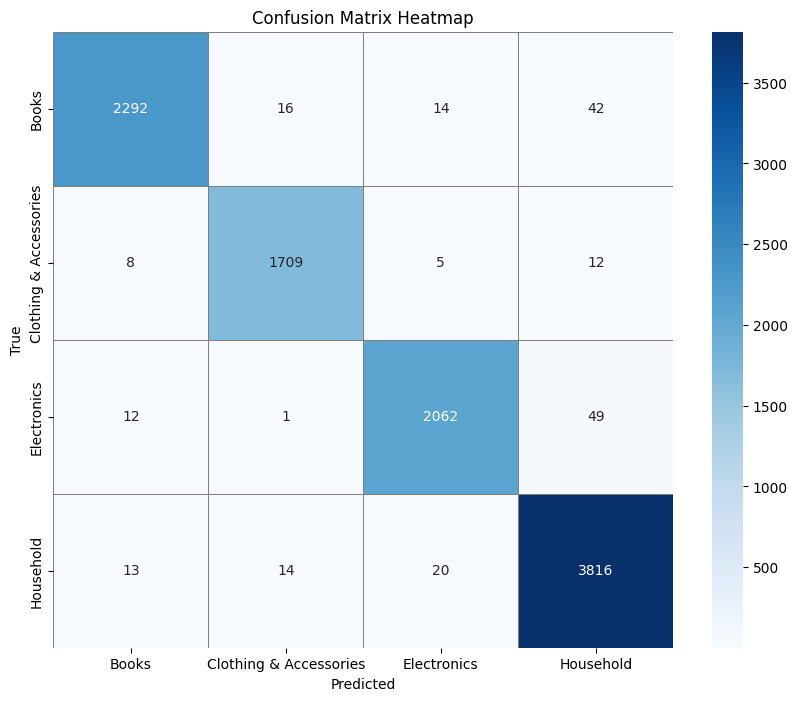

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Get the class labels from the LabelEncoder
class_labels = le.classes_
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, linecolor='gray', linewidth=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print('Classification Report for Test Set:')
print(classification_report(y_test, y_pred))

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2364
           1       0.98      0.99      0.98      1734
           2       0.98      0.97      0.98      2124
           3       0.97      0.99      0.98      3863

    accuracy                           0.98     10085
   macro avg       0.98      0.98      0.98     10085
weighted avg       0.98      0.98      0.98     10085



In [ ]:
# Get predictions on the training set
y_train_pred = model.predict(x_train)
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9456
           1       1.00      1.00      1.00      6937
           2       1.00      0.99      0.99      8497
           3       1.00      1.00      1.00     15450

    accuracy                           1.00     40340
   macro avg       1.00      1.00      1.00     40340
weighted avg       1.00      1.00      1.00     40340

